In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import ttest_ind
import numpy as np
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import calendar

The next cell reads the csvs and excel files from the entire birmingham data

In [2]:
#read csv
# birm_unemployment_df=pd.read_csv('../data/Birmingham_Data/Unemployment Rate_Birmingham-Hoover.csv')
# birm_crime_north_df=pd.read_excel('../data/Birmingham_Data/open-data-north-2023.xlsx')
# birm_crime_south_df=pd.read_excel('../data/Birmingham_Data/open-data-north-2023.xlsx')
# birm_crime_west_df=pd.read_excel('../data/Birmingham_Data/open-data-west-2023.xlsx')
# birm_crime_east_df=pd.read_excel('../data/Birmingham_Data/opendataportal-east-2023.xlsx')  

# Birmingham Crime DF

In [3]:
birm_crime_east_df=pd.read_csv('../data/Birmingham_Data/New_open-data-east-dec-2023.csv')
birm_crime_west_df=pd.read_csv('../data/Birmingham_Data/new_open-data-west-dec-2023.csv')
birm_crime_north_df=pd.read_csv('../data/Birmingham_Data/new_open-data-north-dec-2023.csv')
birm_crime_south_df=pd.read_csv('../data/Birmingham_Data/new_open-data-south-dec-2023.csv')
birm_unemployment_df=pd.read_csv('../data/Birmingham_Data/Unemployment Rate_Birmingham-Hoover.csv')

After reading the file, I am using .head() method to returns the first 5 rows of birmingham east file

In [4]:
birm_crime_east_df.head() #2242 rows × 10 columns

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Case ORI,Reporting District
0,1100,SOUTHWOOD DR,33.594752,-86.734990,35217.0,2024-00001197,12/31/2023 13:00,Theft of Property Auto Theft 1st,AL0010200,E226
1,7800,5TH AVE N,33.565900,-86.732868,35206.0,2024-00000386,12/31/2023 8:00,Miscellaneous Theft-3rd Degree,AL0010200,E225
2,700,CAROLYN CT,33.585178,-86.688707,35206.0,2024-00000461,12/31/2023 7:00,Theft from Residence - 3rd Degree,AL0010200,E226
3,1900,EDWARDS LAKE RD,33.596991,-86.648040,35235.0,2024-00000497,12/30/2023 15:47,Shoplifting 3rd Degree,AL0010200,E231
4,1300,MONTCLAIR RD,33.521160,-86.730759,35210.0,2023-00221256,12/30/2023 15:22,"Larceny/Theft-Shoplifting, less than $500",AL0010200,E220


In [5]:
# birm_crime_east_df.head()
# #2061 rows × 10 columns

In [6]:
birm_crime_south_df.head()     #1916 rows × 255 columns

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District,Unnamed: 8,Unnamed: 9,...,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254
0,1600.0,2ND AVE S,33.509002,-86.807938,35233.0,12/31/2023 22:30:00,Theft - TOP 2nd Degree,S329,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1600.0,5TH AVE S,33.505519,-86.806924,35233.0,12/31/2023 18:15:00,Theft of Property Auto Theft 1st,S329,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3300.0,ALTAMONT RD,33.503688,-86.776184,35205.0,12/31/2023 15:09:00,Miscellaneous Theft-TOP-1st Degree,S322,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2700.0,4TH AVE S,33.513927,-86.791123,35233.0,12/31/2023 11:21:00,Larceny/Theft-TOP 2 $500-less than $1500,S322,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1500.0,11TH AVE S,33.497191,-86.803448,35205.0,12/31/2023 00:25:00,Theft of Property Auto Theft 1st,S322,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
birm_crime_south_df = birm_crime_south_df.drop(birm_crime_south_df.filter(regex='Unnamed:'), axis=1)
birm_crime_south_df.dropna()
# birm_crime_south_df()

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District
0,1600.0,2ND AVE S,33.509002,-86.807938,35233.0,12/31/2023 22:30:00,Theft - TOP 2nd Degree,S329
1,1600.0,5TH AVE S,33.505519,-86.806924,35233.0,12/31/2023 18:15:00,Theft of Property Auto Theft 1st,S329
2,3300.0,ALTAMONT RD,33.503688,-86.776184,35205.0,12/31/2023 15:09:00,Miscellaneous Theft-TOP-1st Degree,S322
3,2700.0,4TH AVE S,33.513927,-86.791123,35233.0,12/31/2023 11:21:00,Larceny/Theft-TOP 2 $500-less than $1500,S322
4,1500.0,11TH AVE S,33.497191,-86.803448,35205.0,12/31/2023 00:25:00,Theft of Property Auto Theft 1st,S322
...,...,...,...,...,...,...,...,...
1901,2300.0,ASPEN RUN APARTMENTS,33.477429,-86.835467,35211.0,01/01/2023 07:15:00,Domestic Burglary - 3rd Degree,S321
1902,1600.0,2ND AVE S,33.509002,-86.807938,35233.0,01/01/2023 00:30:00,Miscellaneous Theft-3rd Degree,S328
1903,200.0,CROSS CREEK CT,33.475118,-86.837141,35209.0,01/01/2023 00:14:00,Disch Firearm into Occupied Bldg/Veh,S321
1904,100.0,23RD AVE S,33.480209,-86.827983,35205.0,01/01/2023 00:05:00,Disch Firearm into Occupied Bldg/Veh,S321


i am droping the columns that are tagged "Unnamed"

In [8]:
birm_crime_west_df.tail() #2275 rows × 8 columns

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District
2270,1700,PEARSON AVE,33.485909,-86.863144,35211.0,1/1/2023 3:00,Domestic Strangulation or Suffocation,W427
2271,1700,PEARSON AVE,33.485909,-86.863144,35211.0,1/1/2023 3:00,Sodomy-With A Woman-Domestic Violence-1st Degree,W427
2272,1500,ARTHUR SHORES DR,33.471651,-86.854865,35211.0,1/1/2023 2:25,Aggravated Assault Family-Gun-1st Degree,W422
2273,1300,JERSEY ST,33.498782,-86.924066,35224.0,1/1/2023 0:10,Disch Firearm into Occupied Bldg/Veh,W437
2274,1600,BOISE AVE,33.482842,-86.856379,35211.0,1/1/2023 0:01,Disch Firearm into Occupied Bldg/Veh,W424


In [9]:
birm_crime_north_df.head()      #1163 rows × 9 columns

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Reporting District
0,600,625 GRAYMONT AVE W,33.508963,-86.847064,35204.0,2023-00222308,12/31/2023 21:00,Domestic Strangulation or Suffocation,N128
1,300,324 9TH ST N,33.509653,-86.822416,35203.0,2024-00000063,12/31/2023 21:00,Theft-Vehicle Parts-3rd Degree,N126
2,1900,1900 BLOCK / 2ND AVE N,NaN,NaN,NaN,2024-00000452,12/31/2023 19:30,Theft of Property Auto Theft 1st,N122
3,500,521 CENTER ST N,33.512071,-86.836200,35204.0,2023-00222077,12/31/2023 19:00,"Larceny/Theft-Shoplifting, less than $500",N127
4,800,815 N 34TH ST,NaN,NaN,NaN,2024-00000859,12/31/2023,Theft - TOP 2nd Degree,N120


I am using .head() method to returns the first 5 rows of birmingham north file

In [10]:
birm_crime_north_df.columns

Index(['Block', 'Street', 'Case Address Latitude', 'Case Address Longitude',
       'Case Address Zip', 'Case Number', 'Case Occurred From Date',
       'Case Offense Statute Description', 'Reporting District'],
      dtype='object')

I am using .columns to returns the label of each column in the DataFrame

In [11]:
birm_crime_south_df.columns

Index(['Block', 'Street', 'Case Address Latitude', 'Case Address Longitude',
       'Case Address Zip', 'Case Occurred From Date',
       'Case Offense Statute Description', 'Reporting District'],
      dtype='object')

I am using .columns to returns the label of each column in the DataFrame

In [12]:
birm_unemployment_df.head(1)

,Series ID,Year,Period,Label,Value
0,LAUMT011382000000003,2021,M01,2021 Jan,4.1


# Concat the four different df

In [13]:
birm_crime_df = pd.concat([birm_crime_north_df, birm_crime_south_df, birm_crime_east_df, birm_crime_west_df], ignore_index=True)
birm_crime_df 

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case ORI
0,600.0,625 GRAYMONT AVE W,33.508963,-86.847064,35204.0,2023-00222308,12/31/2023 21:00,Domestic Strangulation or Suffocation,N128,NaN
1,300.0,324 9TH ST N,33.509653,-86.822416,35203.0,2024-00000063,12/31/2023 21:00,Theft-Vehicle Parts-3rd Degree,N126,NaN
2,1900.0,1900 BLOCK / 2ND AVE N,NaN,NaN,NaN,2024-00000452,12/31/2023 19:30,Theft of Property Auto Theft 1st,N122,NaN
3,500.0,521 CENTER ST N,33.512071,-86.836200,35204.0,2023-00222077,12/31/2023 19:00,"Larceny/Theft-Shoplifting, less than $500",N127,NaN
4,800.0,815 N 34TH ST,NaN,NaN,NaN,2024-00000859,12/31/2023,Theft - TOP 2nd Degree,N120,NaN
...,...,...,...,...,...,...,...,...,...,...
7591,1700.0,PEARSON AVE,33.485909,-86.863144,35211.0,NaN,1/1/2023 3:00,Domestic Strangulation or Suffocation,W427,NaN
7592,1700.0,PEARSON AVE,33.485909,-86.863144,35211.0,NaN,1/1/2023 3:00,Sodomy-With A Woman-Domestic Violence-1st Degree,W427,NaN
7593,1500.0,ARTHUR SHORES DR,33.471651,-86.854865,35211.0,NaN,1/1/2023 2:25,Aggravated Assault Family-Gun-1st Degree,W422,NaN
7594,1300.0,JERSEY ST,33.498782,-86.924066,35224.0,NaN,1/1/2023 0:10,Disch Firearm into Occupied Bldg/Veh,W437,NaN


The pd.concat is the most accurate method to join the entired Birmingham dataframe since it returns the total number of rows and retains the column since they have common values. One would assume that i do merge, but the .merge that not return the entire rows, see update on a simple maths some cells above. using the new data that contains december, i now have 7596 rows × 257 columns instead of #6269 rows × 10 columns 

In [14]:
birm_crime_df.columns

Index(['Block', 'Street', 'Case Address Latitude', 'Case Address Longitude',
       'Case Address Zip', 'Case Number', 'Case Occurred From Date',
       'Case Offense Statute Description', 'Reporting District', 'Case ORI'],
      dtype='object')

 After joining, i use .columns to returns the label of each column in the DataFrame

merged_df_1 = pd.merge(birm_crime_north_df, birm_crime_south_df, how='inner', on= ['Block', 'Street', 'Case Address Latitude', 'Case Address Longitude',
       'Case Address Zip', 'Case Occurred From Date',
       'Case Offense Statute Description', 'Reporting District'])
merged_df_1

Here i am using .merge to join the entire Birmingham data. The result shows that .concat is the best way to join the entire dataframe instead of merge. the entire row is 1082 rows × 8 columns as against #6269 rows × 10 columns from .merge

In [15]:
#top ten crime in birmingham
top_ten_crime_in_birm=birm_crime_df['Case Offense Statute Description'].value_counts()
top_ten_crime_in_birm.head(10)

Case Offense Statute Description
Theft of Property Auto Theft 1st             1747
Disch Firearm into Occupied Bldg/Veh          524
Burglary (Residence) Force 3rd Degree         515
Miscellaneous Theft-3rd Degree                514
Theft - TOP 2nd Degree                        386
Larceny/Theft-Shoplifting, less than $500     358
Burglary-Residence-No Force-3rd Degree        281
Domestic Strangulation or Suffocation         200
Larceny/Theft-TOP 2 $500-less than $1500      183
Theft-Firearms-2nd Degree                     162
Name: count, dtype: int64

this code identifies and lists the top 10 most common crime descriptions in the birm_crime_df DataFrame, based on the frequency of each description. Of the top ten, "Theft of Property Auto Theft 1st", comes up top with 1323 frequency and "Larceny/Theft-TOP 2 $500-less than $1500" with the least number of times, 152. 

# Analysis: top ten crime and number of crime

(<Axes: title={'center': 'Top Ten Crime in Birmingham, AL'}, ylabel='Case Offense Statute Description'>,
 None)

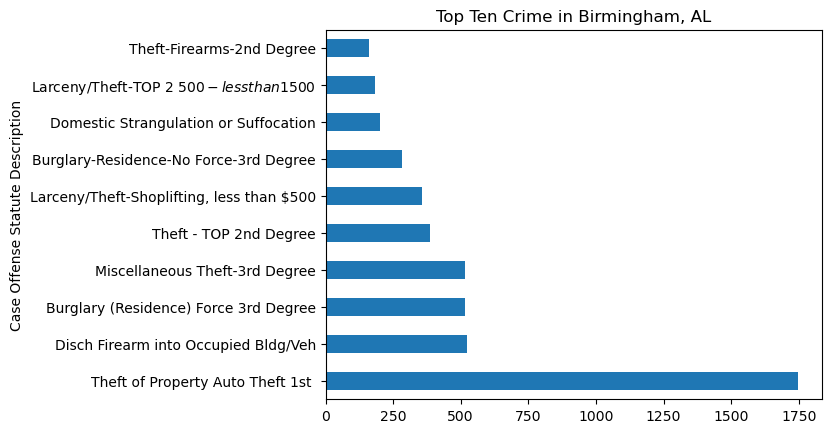

In [16]:
top_ten_crime_in_birm.head(10).plot(kind="barh", title = "Top Ten Crime in Birmingham, AL"), plt.savefig('Top Ten Crime in Birmingham, AL.png', bbox_inches='tight')

Here, I plot a bar plot to display the result of the top ten crime in Birmingham AL, I used plt.savefig to export the png file and "barh" to make it horizontally. 

In [17]:
birm_crime_df.head(2)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case ORI
0,600.0,625 GRAYMONT AVE W,33.508963,-86.847064,35204.0,2023-00222308,12/31/2023 21:00,Domestic Strangulation or Suffocation,N128,NaN
1,300.0,324 9TH ST N,33.509653,-86.822416,35203.0,2024-00000063,12/31/2023 21:00,Theft-Vehicle Parts-3rd Degree,N126,NaN


In [18]:
import calendar

To use the calendar module, I must first import it into your Python script. In the next few codes, i am going to be using the calendar module

In [19]:
#convert to datetime specifying format
birm_crime_df['Case Occurred From Date'] = pd.to_datetime(birm_crime_df['Case Occurred From Date'], format='%m/%d/%Y %H:%M:%S', errors='coerce')
birm_crime_df.head(4)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case ORI
0,600.0,625 GRAYMONT AVE W,33.508963,-86.847064,35204.0,2023-00222308,NaT,Domestic Strangulation or Suffocation,N128,NaN
1,300.0,324 9TH ST N,33.509653,-86.822416,35203.0,2024-00000063,NaT,Theft-Vehicle Parts-3rd Degree,N126,NaN
2,1900.0,1900 BLOCK / 2ND AVE N,NaN,NaN,NaN,2024-00000452,NaT,Theft of Property Auto Theft 1st,N122,NaN
3,500.0,521 CENTER ST N,33.512071,-86.836200,35204.0,2023-00222077,NaT,"Larceny/Theft-Shoplifting, less than $500",N127,NaN


here i am converting the "Case Occurred From Date" column to datetime objects. This conversion is necessary since i am working with time-series data and it involves dates and times

In [20]:
birm_crime_df['Case Offense Statute Description'].unique()

array(['Domestic Strangulation or Suffocation',
       'Theft-Vehicle Parts-3rd Degree',
       'Theft of Property Auto Theft 1st ',
       'Larceny/Theft-Shoplifting, less than $500',
       'Theft - TOP 2nd Degree', 'Theft-Vehicle Parts-4th Degree',
       'Theft from Residence - 3rd Degree', 'Theft-Firearms-2nd Degree',
       'Theft of Lost Property-2nd Degree',
       'Miscellaneous Theft-TOP-1st Degree',
       'Miscellaneous Theft-3rd Degree',
       'Aggravated Assault Non-Family-Knife-2nd Degree',
       'Burglary-Non-Residence-No Force-3rd Degree',
       'Burglary (Residence) Force 3rd Degree',
       'Robbery-Street-Other Weapon-1st Degree', 'Theft by deception',
       'Disch Firearm into Occupied Bldg/Veh',
       'Possession of Burglars Tools',
       'Aggravated Assault Family-Knife-1st Degree',
       'Theft-From Public Building-1st Degree',
       'Aggravated Assault Police Officer-Other Weapon-2nd Degree',
       'Larceny/Theft-TOP 2 $500-less than $1500',
       'Th

i want to identify all the distinct values present in the birm_crime_df 

In [21]:
birm_crime_df['Month Occured'] = birm_crime_df['Case Occurred From Date'].dt.month
birm_crime_df['Month Occured'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Month Occured, dtype: float64

i am Extracting the month number and creating 'Month Occured' column, and making it into a month row.

In [22]:
birm_crime_df.tail(3)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case ORI,Month Occured
7593,1500.0,ARTHUR SHORES DR,33.471651,-86.854865,35211.0,NaN,NaT,Aggravated Assault Family-Gun-1st Degree,W422,NaN,NaN
7594,1300.0,JERSEY ST,33.498782,-86.924066,35224.0,NaN,NaT,Disch Firearm into Occupied Bldg/Veh,W437,NaN,NaN
7595,1600.0,BOISE AVE,33.482842,-86.856379,35211.0,NaN,NaT,Disch Firearm into Occupied Bldg/Veh,W424,NaN,NaN


In [23]:
birm_crime_df['Case Address Zip'].dtype

dtype('float64')

I am trying to figure out the attribute of the ['Case Address Zip'] data type, it is if a float or integer as you would observe the I will convert it to integer in the next cell

In [24]:
birm_crime_df = birm_crime_df.dropna(subset=['Case Address Zip'])
birm_crime_df['Case Address Zip'] = birm_crime_df['Case Address Zip'].astype(int)

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_49116/2628554234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birm_crime_df['Case Address Zip'] = birm_crime_df['Case Address Zip'].astype(int)


Here, i convert ['Case Address Zip'] to integer using .astype and cleaned zipcode column. The rows has the "35211.0	", the "0" at the end of each zip code is cleaned and can look like a normal AL zipcode

In [25]:
birm_crime_df['Case Address Zip'] = birm_crime_df['Case Address Zip'].fillna(0).astype(int)
birm_crime_df['Case Address Zip']

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_49116/1003581924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birm_crime_df['Case Address Zip'] = birm_crime_df['Case Address Zip'].fillna(0).astype(int)


0       35204
1       35203
3       35204
5       35207
6       35204
        ...  
7591    35211
7592    35211
7593    35211
7594    35224
7595    35211
Name: Case Address Zip, Length: 7326, dtype: int64

filling any empty row as NA

In [26]:
birm_crime_df.head(4)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case ORI,Month Occured
0,600.0,625 GRAYMONT AVE W,33.508963,-86.847064,35204,2023-00222308,NaT,Domestic Strangulation or Suffocation,N128,NaN,NaN
1,300.0,324 9TH ST N,33.509653,-86.822416,35203,2024-00000063,NaT,Theft-Vehicle Parts-3rd Degree,N126,NaN,NaN
3,500.0,521 CENTER ST N,33.512071,-86.836200,35204,2023-00222077,NaT,"Larceny/Theft-Shoplifting, less than $500",N127,NaN,NaN
5,3000.0,3020 41ST CT N,33.565703,-86.808445,35207,2024-00000923,NaT,Theft-Vehicle Parts-4th Degree,N132,NaN,NaN


The "Case Address Zip" all look cleaned now. 

In [27]:
num_offense_per_zip=birm_crime_df.groupby('Case Address Zip')['Case Offense Statute Description'].value_counts()
num_offense_per_zip

Case Address Zip  Case Offense Statute Description                     
35020             Theft of Property Auto Theft 1st                         10
                  Disch Firearm into Occupied Bldg/Veh                      5
                  Larceny/Theft-TOP 2 $500-less than $1500                  3
                  Theft - TOP 2nd Degree                                    2
                  Burglary (Residence) Force 3rd Degree                     2
                                                                           ..
35294             Aggravated Assault Family-Gun-1st Degree                  1
                  Aggravated Assault Non-Family-Gun-2nd Degree              1
                  Disch Firearm into Occupied Bldg/Veh                      1
                  Aggravated Assault Non-Family-Other Weapon-1st Degree     1
35487             Theft of Property Auto Theft 1st                          1
Name: count, Length: 1262, dtype: int64

I analyze the df, specifically focusing on the frequency of different types of crimes based on their statute descriptions and grouping these frequencies by zip codes where the crimes occurred

In [28]:
total_offenses_per_zip = birm_crime_df.groupby('Case Address Zip')['Case Offense Statute Description'].count().sort_values(ascending=False).head(15)
total_offenses_per_zip.head

<bound method NDFrame.head of Case Address Zip
35211    880
35206    701
35208    605
35215    525
35204    500
35212    476
35205    470
35203    344
35218    287
35233    262
35222    237
35207    236
35209    218
35210    217
35214    214
Name: Case Offense Statute Description, dtype: int64>

I am performing a data aggregation and sorting operations on a df. For each group (ZIP code), the .count() method is applied to the 'Case Offense Statute Description' column to count the number of offenses recorded in each ZIP code. I now sort resulting Series from the count operation in descending order using the .sort_values() method with the ascending=False parameter. 

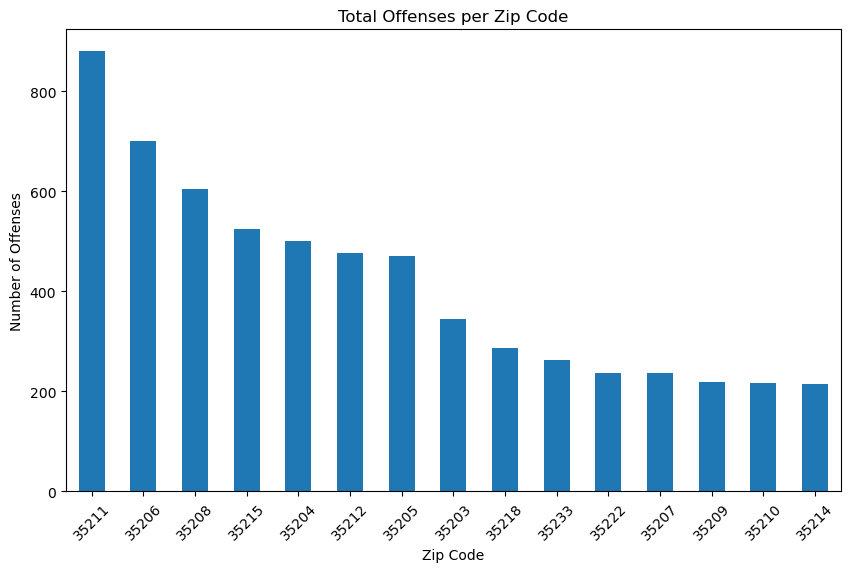

In [29]:
total_offenses_per_zip.plot(kind='bar', figsize=(10, 6))
plt.title('Total Offenses per Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Number of Offenses')
plt.xticks(rotation=45)
plt.savefig('Total Offenses per Zip Code.png', bbox_inches='tight')
plt.show()

I am displaying the plot of my code here. The plot here displays that 35204 has the highest number of crime and 35228 the lowest in Birmingham. 

In [30]:
num_offense_per_zip_df = num_offense_per_zip.reset_index(name='Counts').head(20)
num_offense_per_zip_df.head()

,Case Address Zip,Case Offense Statute Description,Counts
0,35020,Theft of Property Auto Theft 1st,10
1,35020,Disch Firearm into Occupied Bldg/Veh,5
2,35020,Larceny/Theft-TOP 2 $500-less than $1500,3
3,35020,Theft - TOP 2nd Degree,2
4,35020,Burglary (Residence) Force 3rd Degree,2


In [31]:
birm_crime_df_geo = gpd.GeoDataFrame(birm_crime_df, geometry=gpd.points_from_xy(birm_crime_df['Case Address Longitude'], birm_crime_df['Case Address Latitude']))
birm_crime_df_geo

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case ORI,Month Occured,geometry
0,600.0,625 GRAYMONT AVE W,33.508963,-86.847064,35204,2023-00222308,NaT,Domestic Strangulation or Suffocation,N128,NaN,NaN,POINT (-86.84706 33.50896)
1,300.0,324 9TH ST N,33.509653,-86.822416,35203,2024-00000063,NaT,Theft-Vehicle Parts-3rd Degree,N126,NaN,NaN,POINT (-86.82242 33.50965)
3,500.0,521 CENTER ST N,33.512071,-86.836200,35204,2023-00222077,NaT,"Larceny/Theft-Shoplifting, less than $500",N127,NaN,NaN,POINT (-86.83620 33.51207)
5,3000.0,3020 41ST CT N,33.565703,-86.808445,35207,2024-00000923,NaT,Theft-Vehicle Parts-4th Degree,N132,NaN,NaN,POINT (-86.80844 33.56570)
6,400.0,479 1ST ST W,33.509390,-86.838008,35204,2023-00220965,NaT,Theft - TOP 2nd Degree,N128,NaN,NaN,POINT (-86.83801 33.50939)
...,...,...,...,...,...,...,...,...,...,...,...,...
7591,1700.0,PEARSON AVE,33.485909,-86.863144,35211,NaN,NaT,Domestic Strangulation or Suffocation,W427,NaN,NaN,POINT (-86.86314 33.48591)
7592,1700.0,PEARSON AVE,33.485909,-86.863144,35211,NaN,NaT,Sodomy-With A Woman-Domestic Violence-1st Degree,W427,NaN,NaN,POINT (-86.86314 33.48591)
7593,1500.0,ARTHUR SHORES DR,33.471651,-86.854865,35211,NaN,NaT,Aggravated Assault Family-Gun-1st Degree,W422,NaN,NaN,POINT (-86.85486 33.47165)
7594,1300.0,JERSEY ST,33.498782,-86.924066,35224,NaN,NaT,Disch Firearm into Occupied Bldg/Veh,W437,NaN,NaN,POINT (-86.92407 33.49878)


I am using geopandas to convert long and lat to points

In [32]:
birm_crime_df_geo['geometry']

0       POINT (-86.84706 33.50896)
1       POINT (-86.82242 33.50965)
3       POINT (-86.83620 33.51207)
5       POINT (-86.80844 33.56570)
6       POINT (-86.83801 33.50939)
                   ...            
7591    POINT (-86.86314 33.48591)
7592    POINT (-86.86314 33.48591)
7593    POINT (-86.85486 33.47165)
7594    POINT (-86.92407 33.49878)
7595    POINT (-86.85638 33.48284)
Name: geometry, Length: 7326, dtype: geometry

<Axes: >

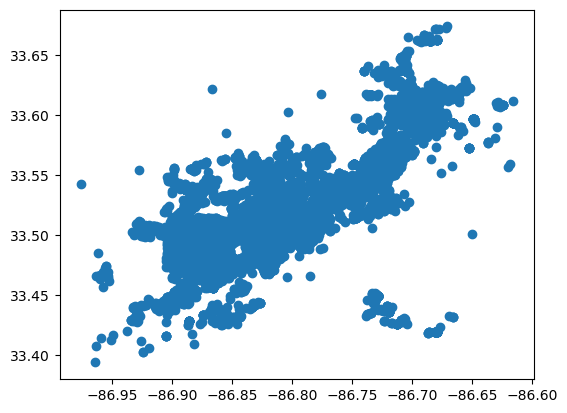

In [33]:
birm_crime_df_geo.plot()

i created this yesterday, not part of the original project that i did. Just messing with the code

In [34]:
birm_crime_df_geo = birm_crime_df_geo[['Case Address Zip', 'Case Offense Statute Description', 'geometry']]#use the double bracket to drop the column instead of the .drop, they do the same thing
birm_crime_df_geo.head()

,Case Address Zip,Case Offense Statute Description,geometry
0,35204,Domestic Strangulation or Suffocation,POINT (-86.84706 33.50896)
1,35203,Theft-Vehicle Parts-3rd Degree,POINT (-86.82242 33.50965)
3,35204,"Larceny/Theft-Shoplifting, less than $500",POINT (-86.83620 33.51207)
5,35207,Theft-Vehicle Parts-4th Degree,POINT (-86.80844 33.56570)
6,35204,Theft - TOP 2nd Degree,POINT (-86.83801 33.50939)


In [35]:
# crime_count_per_zip = gpd.sjoin(bus_geo, zipcodes, predicate = 'within')
crime_count_per_zip= birm_crime_df_geo['Case Address Zip'].value_counts()
crime_count_per_zip.head(15)

Case Address Zip
35211    880
35206    701
35208    605
35215    525
35204    500
35212    476
35205    470
35203    344
35218    287
35233    262
35222    237
35207    236
35209    218
35210    217
35214    214
Name: count, dtype: int64

In [36]:
birm_crime_df_geo['Case Address Zip'].dtypes

dtype('int64')

In [37]:
birm_crime_df_geo['Case Address Zip'].astype(str)

0       35204
1       35203
3       35204
5       35207
6       35204
        ...  
7591    35211
7592    35211
7593    35211
7594    35224
7595    35211
Name: Case Address Zip, Length: 7326, dtype: object

In [38]:
crime_count_per_zip.dtypes

dtype('int64')

In [39]:
# #Offenses per Zip Code 
# num_offense_per_zip_df.pivot(index='Case Address Zip', columns='Case Offense Statute Description', values='Counts').plot(kind='bar', stacked=True, figsize=(10, 6))

# plt.title('Offenses per Zip Code by Offense Type')
# plt.xlabel('Zip Code')
# plt.ylabel('Number of Offenses')
# plt.xticks(rotation=45)
# plt.legend(title='Offense Type')
# plt.savefig('Offenses per Zip Code by Offense Type.png', bbox_inches='tight')
# plt.show()

In [40]:
# top_15_crimes_in_birm = birm_crime_df['Case Offense Statute Description'].value_counts().sort_values(ascending=False).head(15)
# top_15_crimes_in_birm.plot(kind="barh", title = "Top 15 Crime in Birmingham")
# plt.savefig('Top 15 Crime in Birmingham.png', bbox_inches='tight')

This plot displays the top 15 crime in Birnmigham with Theft of Property Auto theft as the highest and Domestic Burglary as the lowest. 

In [41]:
birm_crime_df.tail(6)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case ORI,Month Occured
7590,1500.0,MATT LEONARD DR SW,33.464267,-86.854970,35211,NaN,NaT,Auto Theft and Sale-1st Degree,W422,NaN,NaN
7591,1700.0,PEARSON AVE,33.485909,-86.863144,35211,NaN,NaT,Domestic Strangulation or Suffocation,W427,NaN,NaN
7592,1700.0,PEARSON AVE,33.485909,-86.863144,35211,NaN,NaT,Sodomy-With A Woman-Domestic Violence-1st Degree,W427,NaN,NaN
7593,1500.0,ARTHUR SHORES DR,33.471651,-86.854865,35211,NaN,NaT,Aggravated Assault Family-Gun-1st Degree,W422,NaN,NaN
7594,1300.0,JERSEY ST,33.498782,-86.924066,35224,NaN,NaT,Disch Firearm into Occupied Bldg/Veh,W437,NaN,NaN
7595,1600.0,BOISE AVE,33.482842,-86.856379,35211,NaN,NaT,Disch Firearm into Occupied Bldg/Veh,W424,NaN,NaN


In [42]:
#number of crime per street
top_crime_per_street=birm_crime_df.groupby(['Street', 'Case Offense Statute Description'])['Case Offense Statute Description'].value_counts().sort_values(ascending=False).head(15)
top_crime_per_street

Street              Case Offense Statute Description          
MONTCLAIR RD        Larceny/Theft-Shoplifting, less than $500     83
1ST AVE N           Theft of Property Auto Theft 1st              32
4TH AVE S           Theft of Property Auto Theft 1st              28
SUMMIT BLVD         Shoplifting 3rd Degree                        21
BESSEMER RD         Theft of Property Auto Theft 1st              19
2ND AVE S           Theft of Property Auto Theft 1st              19
SUMMIT BLVD         Larceny/Theft-Shoplifting, less than $500     18
MONTCLAIR RD        Theft of Property Auto Theft 1st              18
MESSER AIRPORT HWY  Theft of Property Auto Theft 1st              17
1ST AVE S           Theft of Property Auto Theft 1st              17
5TH AVE S           Theft of Property Auto Theft 1st              16
1ST AVE N           Miscellaneous Theft-3rd Degree                15
3RD AVE S           Theft of Property Auto Theft 1st              15
PARKWAY E           Theft of Property Au

displaying the nuber of crime per street and the type of crime, Montclair road has Larceny/Theft-Shoplifting, less than $500 as 77 count and 2nd Ave has "Theft - TOP 2nd Degree" as one of the lowest with 12 counts 

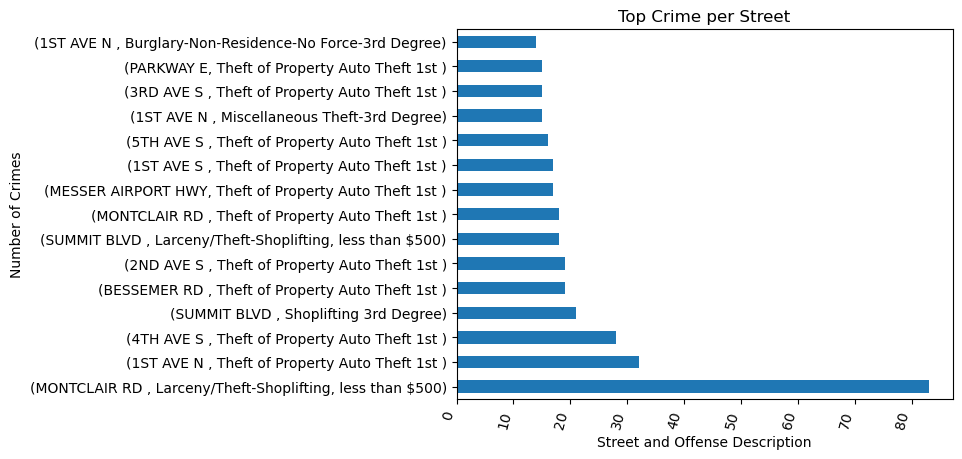

In [43]:
#visualizing the number of crime per street
ax = top_crime_per_street.plot.barh()
ax.set_title('Top Crime per Street')
ax.set_xlabel('Street and Offense Description')
ax.set_ylabel('Number of Crimes')
plt.xticks(rotation=75, ha='right')
plt.savefig('Birmingham Top Crime per Street.png', bbox_inches='tight')
plt.show()

here is a visualization of the code above

In [44]:
birm_crime_df['Time_Occured'] = birm_crime_df['Case Occurred From Date'].dt.time
birm_crime_df['Time_Occured']

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_49116/2980771205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birm_crime_df['Time_Occured'] = birm_crime_df['Case Occurred From Date'].dt.time


0       NaT
1       NaT
3       NaT
5       NaT
6       NaT
       ... 
7591    NaT
7592    NaT
7593    NaT
7594    NaT
7595    NaT
Name: Time_Occured, Length: 7326, dtype: object

when does crime happen most. i also converted the 'Case Occurred From Date' to date time which enables me to get the time when crime occurs most. 

In [45]:
birm_crime_df.head(4)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case ORI,Month Occured,Time_Occured
0,600.0,625 GRAYMONT AVE W,33.508963,-86.847064,35204,2023-00222308,NaT,Domestic Strangulation or Suffocation,N128,NaN,NaN,NaT
1,300.0,324 9TH ST N,33.509653,-86.822416,35203,2024-00000063,NaT,Theft-Vehicle Parts-3rd Degree,N126,NaN,NaN,NaT
3,500.0,521 CENTER ST N,33.512071,-86.836200,35204,2023-00222077,NaT,"Larceny/Theft-Shoplifting, less than $500",N127,NaN,NaN,NaT
5,3000.0,3020 41ST CT N,33.565703,-86.808445,35207,2024-00000923,NaT,Theft-Vehicle Parts-4th Degree,N132,NaN,NaN,NaT


In [46]:
times_crimes_occured_most=birm_crime_df.groupby(['Time_Occured', 'Case Offense Statute Description'])['Case Offense Statute Description'].value_counts().sort_values(ascending=False).head(15)

In [47]:
times_crimes_occured_most

Time_Occured  Case Offense Statute Description 
22:00:00      Theft of Property Auto Theft 1st     27
23:00:00      Theft of Property Auto Theft 1st     26
20:00:00      Theft of Property Auto Theft 1st     24
18:00:00      Theft of Property Auto Theft 1st     20
08:00:00      Theft of Property Auto Theft 1st     20
12:00:00      Miscellaneous Theft-3rd Degree       18
              Theft by deception                   14
17:00:00      Theft of Property Auto Theft 1st     13
08:00:00      Miscellaneous Theft-3rd Degree       12
12:00:00      Theft of Property Auto Theft 1st     12
21:00:00      Theft of Property Auto Theft 1st     11
18:30:00      Theft of Property Auto Theft 1st     10
22:30:00      Theft of Property Auto Theft 1st     10
02:00:00      Theft of Property Auto Theft 1st     10
17:30:00      Theft of Property Auto Theft 1st     10
Name: count, dtype: int64

On this cell, it appears that "Theft of Property Auto Theft 1st" happen most of the time with the time range most of the time from 22-23:00

<Axes: title={'center': 'Most Crime Events by Day'}, ylabel='Time_Occured,Case Offense Statute Description'>

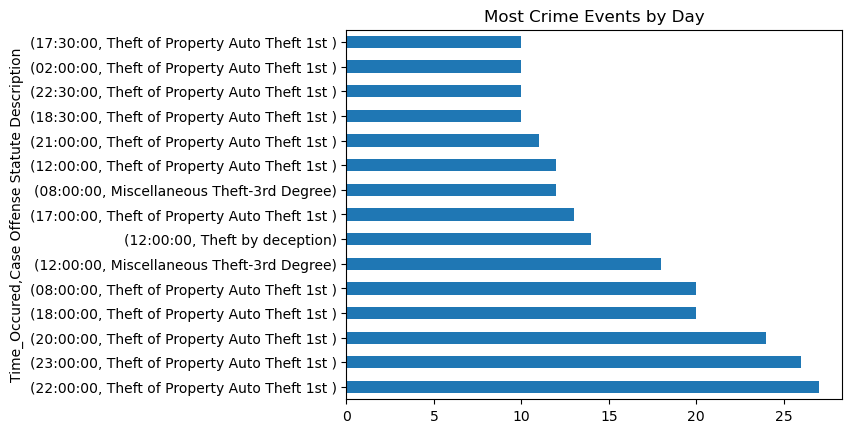

In [48]:
times_crimes_occured_most.plot(kind = 'barh', title ='Most Crime Events by Day')

In [49]:
birm_crime_df['Month Occured'].unique()

array([nan, 12., 11., 10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

In [50]:
#convert number to month
birm_crime_df['Month Occured'] = birm_crime_df['Month Occured'].apply(lambda x: calendar.month_name[int(x)] if pd.notnull(x) else x)

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_49116/2107535113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birm_crime_df['Month Occured'] = birm_crime_df['Month Occured'].apply(lambda x: calendar.month_name[int(x)] if pd.notnull(x) else x)


remember that i have already converted the months to number, and here i am changing the number months to names, like jan and etc. 

In [51]:
birm_crime_df['Month Occured']

0       NaN
1       NaN
3       NaN
5       NaN
6       NaN
       ... 
7591    NaN
7592    NaN
7593    NaN
7594    NaN
7595    NaN
Name: Month Occured, Length: 7326, dtype: object

In [52]:
birm_crime_df.head()

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case ORI,Month Occured,Time_Occured
0,600.0,625 GRAYMONT AVE W,33.508963,-86.847064,35204,2023-00222308,NaT,Domestic Strangulation or Suffocation,N128,NaN,NaN,NaT
1,300.0,324 9TH ST N,33.509653,-86.822416,35203,2024-00000063,NaT,Theft-Vehicle Parts-3rd Degree,N126,NaN,NaN,NaT
3,500.0,521 CENTER ST N,33.512071,-86.836200,35204,2023-00222077,NaT,"Larceny/Theft-Shoplifting, less than $500",N127,NaN,NaN,NaT
5,3000.0,3020 41ST CT N,33.565703,-86.808445,35207,2024-00000923,NaT,Theft-Vehicle Parts-4th Degree,N132,NaN,NaN,NaT
6,400.0,479 1ST ST W,33.509390,-86.838008,35204,2023-00220965,NaT,Theft - TOP 2nd Degree,N128,NaN,NaN,NaT


In [53]:
#Replace the month with type abbreviations. 
birm_crime_df['Month Occured']
def update_month(abrv):
    birm_crime_df['Month Occured']=birm_crime_df['Month Occured'].map(abrv)
    return birm_crime_df
abrv={'January': "Jan",
        'February': "Feb",
        'March': "Mar",
        'April': "Apr",
        'May': "May",
        'June': "Jun",
        'July': "Jul",
        'August': "Aug",
        'September': "Sep",
        'October': "Oct",
        'November': "Nov",
        'December': "Dec"}
birm_crime_df = update_month(abrv)
birm_crime_df.head()

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_49116/3490740825.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birm_crime_df['Month Occured']=birm_crime_df['Month Occured'].map(abrv)


,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case ORI,Month Occured,Time_Occured
0,600.0,625 GRAYMONT AVE W,33.508963,-86.847064,35204,2023-00222308,NaT,Domestic Strangulation or Suffocation,N128,NaN,NaN,NaT
1,300.0,324 9TH ST N,33.509653,-86.822416,35203,2024-00000063,NaT,Theft-Vehicle Parts-3rd Degree,N126,NaN,NaN,NaT
3,500.0,521 CENTER ST N,33.512071,-86.836200,35204,2023-00222077,NaT,"Larceny/Theft-Shoplifting, less than $500",N127,NaN,NaN,NaT
5,3000.0,3020 41ST CT N,33.565703,-86.808445,35207,2024-00000923,NaT,Theft-Vehicle Parts-4th Degree,N132,NaN,NaN,NaT
6,400.0,479 1ST ST W,33.509390,-86.838008,35204,2023-00220965,NaT,Theft - TOP 2nd Degree,N128,NaN,NaN,NaT


i am creating a define function that would be reusable that performs the name change from {'January': "Jan",}

In [54]:
birm_crime_df['Month Occured'].unique()

array([nan, 'Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

In [55]:
crime_counts_by_month = birm_crime_df.groupby(['Month Occured', 'Case Offense Statute Description']).size().reset_index(name='Count')
crime_counts_by_month

,Month Occured,Case Offense Statute Description,Count
0,Apr,Aggravated Assault Family-Gun-1st Degree,1
1,Apr,Aggravated Assault Non-Family-Gun-2nd Degree,1
2,Apr,Aggravated Assault Non-Family-Knife-1st Degree,1
3,Apr,Aggravated Assault Non-Family-Other Weapon-1st...,1
4,Apr,Attempt to Commit Murder,6
...,...,...,...
467,Sep,Theft-Firearms-3rd Degree,2
468,Sep,Theft-From Residence-2nd Degree,2
469,Sep,Theft-From Shipment-1st Degree,1
470,Sep,Theft-Vehicle Parts-3rd Degree,1


Here i am performing a group-by operation on the birm_crime_df, grouping by two columns: 'Month Occured' and 'Case Offense Statute Description'. After grouping, i want to count the number of occurrences within each group. This is achieved by using the .size() method, which counts the number of elements in each group. The .reset_index(name='Count') part of the code then converts the resulting Series into a DataFrame and renames the column containing the counts to 'Count'. 

# Crime per month

In [56]:
most_crime_per_month = birm_crime_df.groupby('Month Occured')['Case Offense Statute Description'].value_counts().sort_values(ascending=False).head(15)

In [57]:
most_crime_per_month

Month Occured  Case Offense Statute Description 
Sep            Theft of Property Auto Theft 1st     68
Aug            Theft of Property Auto Theft 1st     49
Jun            Theft of Property Auto Theft 1st     49
Oct            Theft of Property Auto Theft 1st     47
Nov            Theft of Property Auto Theft 1st     44
Jul            Theft of Property Auto Theft 1st     42
May            Theft of Property Auto Theft 1st     36
Jan            Theft of Property Auto Theft 1st     32
Dec            Theft of Property Auto Theft 1st     30
Apr            Theft of Property Auto Theft 1st     28
Feb            Theft of Property Auto Theft 1st     21
Jun            Miscellaneous Theft-3rd Degree       20
May            Miscellaneous Theft-3rd Degree       19
Jan            Miscellaneous Theft-3rd Degree       18
Mar            Miscellaneous Theft-3rd Degree       18
Name: count, dtype: int64

here, i am looking at the most crime per month, just like i did a groupby operation, like the cell above, i am doing the same here, but groupd by ('Month Occured'). i want to identify and display the top 15 most frequent crime types that occurred each month within the df

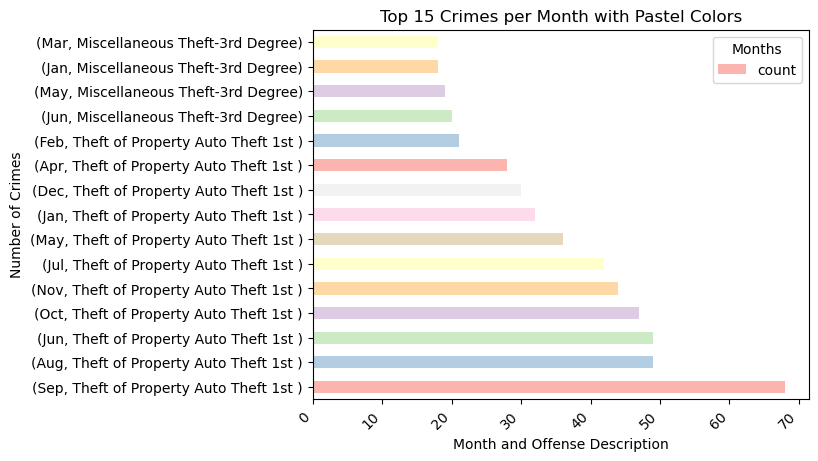

In [58]:
colors = plt.cm.Pastel1.colors
#Using pastel color scheme
ax = most_crime_per_month.plot.barh(color=[colors[i % len(colors)] for i in range(len(most_crime_per_month))])
ax.set_title('Top 15 Crimes per Month with Pastel Colors')
ax.set_xlabel('Month and Offense Description')
ax.set_ylabel('Number of Crimes')
plt.legend(title='Months')
plt.xticks(rotation=45, ha='right')
plt.savefig('Birmingham Top 15 Crimes per Month with Pastel Colors.png', bbox_inches='tight')
plt.show()

i now visualize the code here

In [59]:
most_crime_by_time = birm_crime_df.groupby('Time_Occured')['Case Offense Statute Description'].value_counts().sort_values(ascending=False).head(15) 
most_crime_by_time

Time_Occured  Case Offense Statute Description 
22:00:00      Theft of Property Auto Theft 1st     27
23:00:00      Theft of Property Auto Theft 1st     26
20:00:00      Theft of Property Auto Theft 1st     24
08:00:00      Theft of Property Auto Theft 1st     20
18:00:00      Theft of Property Auto Theft 1st     20
12:00:00      Miscellaneous Theft-3rd Degree       18
              Theft by deception                   14
17:00:00      Theft of Property Auto Theft 1st     13
12:00:00      Theft of Property Auto Theft 1st     12
08:00:00      Miscellaneous Theft-3rd Degree       12
21:00:00      Theft of Property Auto Theft 1st     11
22:30:00      Theft of Property Auto Theft 1st     10
17:30:00      Theft of Property Auto Theft 1st     10
02:00:00      Theft of Property Auto Theft 1st     10
18:30:00      Theft of Property Auto Theft 1st     10
Name: count, dtype: int64

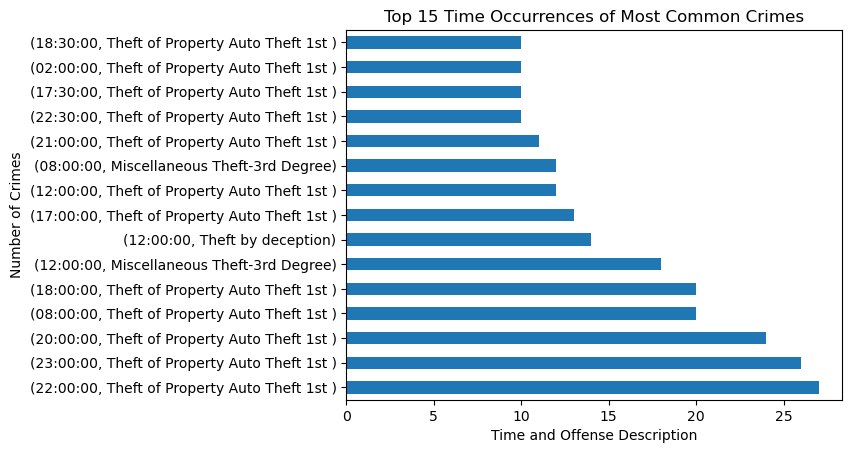

In [60]:
ax = most_crime_by_time.plot.barh()
ax.set_title('Top 15 Time Occurrences of Most Common Crimes')
ax.set_xlabel('Time and Offense Description')
ax.set_ylabel('Number of Crimes')
plt.savefig('Birmingham Top 15 Time Occurrences of Most Common Crimes.png', bbox_inches='tight')
plt.show()

In [61]:
crime_count_by_Month = birm_crime_df.groupby('Month Occured').size()
crime_count_by_Month

Month Occured
Apr    133
Aug    156
Dec    120
Feb    108
Jan    156
Jul    157
Jun    161
Mar    139
May    151
Nov    133
Oct    152
Sep    177
dtype: int64

The code identifies the crime count by each month and counts the number of occurance

In [62]:
crime_count_by_Month_df = crime_count_by_Month.reset_index(name='Crime Count')
crime_count_by_Month_df

,Month Occured,Crime Count
0,Apr,133
1,Aug,156
2,Dec,120
3,Feb,108
4,Jan,156
5,Jul,157
6,Jun,161
7,Mar,139
8,May,151
9,Nov,133


Here, i create a df to create a column "Month Occured" and "Crime Count"

In [63]:
birm_unemployment_df.head(1)

,Series ID,Year,Period,Label,Value
0,LAUMT011382000000003,2021,M01,2021 Jan,4.1


runing the unemployment data

In [64]:
birm_unemployment_df[['Year', 'Month']] = birm_unemployment_df['Label'].str.split(' ', expand=True)
birm_unemployment_df.head()

,Series ID,Year,Period,Label,Value,Month
0,LAUMT011382000000003,2021,M01,2021 Jan,4.1,Jan
1,LAUMT011382000000003,2021,M02,2021 Feb,3.8,Feb
2,LAUMT011382000000003,2021,M03,2021 Mar,3.4,Mar
3,LAUMT011382000000003,2021,M04,2021 Apr,3.0,Apr
4,LAUMT011382000000003,2021,M05,2021 May,2.9,May


This code extracts the month information from a column named "Label" and stores these values into a new column named  "Month". It then displays the first few rows of the modified DataFrame.

In [65]:
birm_unemployment_df.rename(columns={'Value': 'Unemployment Rate'}, inplace=True)
birm_unemployment_df.tail(5)

,Series ID,Year,Period,Label,Unemployment Rate,Month
31,LAUMT011382000000003,2023,M08,2023 Aug,2.3,Aug
32,LAUMT011382000000003,2023,M09,2023 Sep,2.3,Sep
33,LAUMT011382000000003,2023,M10,2023 Oct,2.2,Oct
34,LAUMT011382000000003,2023,M11,2023 Nov,2.3,Nov
35,LAUMT011382000000003,2023,M12,2023 Dec,2.4,Dec


This code renames the Value column to Unemployed Population and stores these values into new column named "Unemployed Population". It then displays the tail of the modified df

In [66]:
birm_unemployment_df_2023 = birm_unemployment_df[birm_unemployment_df['Year'] == "2023"]
birm_unemployment_df_2023

,Series ID,Year,Period,Label,Unemployment Rate,Month
24,LAUMT011382000000003,2023,M01,2023 Jan,2.3,Jan
25,LAUMT011382000000003,2023,M02,2023 Feb,2.2,Feb
26,LAUMT011382000000003,2023,M03,2023 Mar,1.8,Mar
27,LAUMT011382000000003,2023,M04,2023 Apr,1.6,Apr
28,LAUMT011382000000003,2023,M05,2023 May,2.0,May
29,LAUMT011382000000003,2023,M06,2023 Jun,2.5,Jun
30,LAUMT011382000000003,2023,M07,2023 Jul,2.1,Jul
31,LAUMT011382000000003,2023,M08,2023 Aug,2.3,Aug
32,LAUMT011382000000003,2023,M09,2023 Sep,2.3,Sep
33,LAUMT011382000000003,2023,M10,2023 Oct,2.2,Oct


Here, i am extracting the year 2023, that means, i am looking for when the year =2023, because the birmingham crime data only has year as 2023

In [67]:
birm_unemployment_df_2023=birm_unemployment_df_2023[['Year', 'Unemployment Rate', 'Month']]
birm_unemployment_df_2023.head()

,Year,Unemployment Rate,Month
24,2023,2.3,Jan
25,2023,2.2,Feb
26,2023,1.8,Mar
27,2023,1.6,Apr
28,2023,2.0,May


I am isolating specific columns of interest from the df ['Year', 'Unemployed Population', 'Month'] and displaying the first few rows of the resulting dataset.  

In [68]:
birm_unemployment_df_month = birm_unemployment_df_2023[['Unemployment Rate', 'Month']]
birm_unemployment_df_month

,Unemployment Rate,Month
24,2.3,Jan
25,2.2,Feb
26,1.8,Mar
27,1.6,Apr
28,2.0,May
29,2.5,Jun
30,2.1,Jul
31,2.3,Aug
32,2.3,Sep
33,2.2,Oct


I am doing almost the same thing here as above, isolating specific columns of interest from the df [Unemployed Population', 'Month'] and displaying the first few rows of the resulting dataset.  

In [69]:
#reset index
birm_unemployment_df_month.reset_index(inplace=True, drop=True)
birm_unemployment_df_month.head(12)

,Unemployment Rate,Month
0,2.3,Jan
1,2.2,Feb
2,1.8,Mar
3,1.6,Apr
4,2.0,May
5,2.5,Jun
6,2.1,Jul
7,2.3,Aug
8,2.3,Sep
9,2.2,Oct


reseting index

In [70]:
crime_unemployment_year = pd.merge(birm_unemployment_df_month, crime_count_by_Month_df,left_on='Month', right_on='Month Occured', how='outer')
crime_unemployment_year

,Unemployment Rate,Month,Month Occured,Crime Count
0,2.3,Jan,Jan,156
1,2.2,Feb,Feb,108
2,1.8,Mar,Mar,139
3,1.6,Apr,Apr,133
4,2.0,May,May,151
5,2.5,Jun,Jun,161
6,2.1,Jul,Jul,157
7,2.3,Aug,Aug,156
8,2.3,Sep,Sep,177
9,2.2,Oct,Oct,152


merge birm_unemployment_df_month and crime_count_by_Month_df

In [71]:
crime_unemployment_year=crime_unemployment_year[['Unemployment Rate','Month','Crime Count']]
crime_unemployment_year

,Unemployment Rate,Month,Crime Count
0,2.3,Jan,156
1,2.2,Feb,108
2,1.8,Mar,139
3,1.6,Apr,133
4,2.0,May,151
5,2.5,Jun,161
6,2.1,Jul,157
7,2.3,Aug,156
8,2.3,Sep,177
9,2.2,Oct,152


This code shows the number of crime by per in relation with the number of unemployed. One thing is clear, there is the high crime count despite the number of unemployed. 

In [72]:
avg_crime_per_month=crime_unemployment_year.groupby('Month')['Crime Count'].mean().dropna()
avg_crime_per_month

Month
Apr    133.0
Aug    156.0
Dec    120.0
Feb    108.0
Jan    156.0
Jul    157.0
Jun    161.0
Mar    139.0
May    151.0
Nov    133.0
Oct    152.0
Sep    177.0
Name: Crime Count, dtype: float64

The average crime count per month, on an average, June has the highest number of crime count, followed by July while february is the lowest

(<Axes: title={'center': 'Average Crime Count Month'}, xlabel='Month', ylabel='Crime Count'>,
 None)

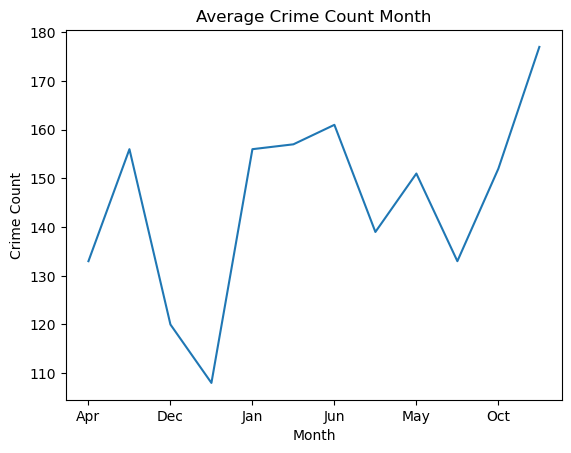

In [73]:
avg_crime_per_month.plot(kind="line", xlabel='Month', ylabel='Crime Count', title = "Average Crime Count Month"), plt.savefig('Average Crime Count Month.png', bbox_inches='tight')

The line graph demonstrates the crime count per month

In [74]:
avg_count_per_unemployment=crime_unemployment_year.groupby('Crime Count')['Unemployment Rate'].mean() 
avg_count_per_unemployment

Crime Count
108    2.20
120    2.40
133    1.95
139    1.80
151    2.00
152    2.20
156    2.30
157    2.10
161    2.50
177    2.30
Name: Unemployment Rate, dtype: float64

In [75]:
birm_crime_df.to_csv('birmingham_crime.csv')

i am exporting to csv to use for my tableau

In [76]:
birm_crime_df.head()

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case ORI,Month Occured,Time_Occured
0,600.0,625 GRAYMONT AVE W,33.508963,-86.847064,35204,2023-00222308,NaT,Domestic Strangulation or Suffocation,N128,NaN,NaN,NaT
1,300.0,324 9TH ST N,33.509653,-86.822416,35203,2024-00000063,NaT,Theft-Vehicle Parts-3rd Degree,N126,NaN,NaN,NaT
3,500.0,521 CENTER ST N,33.512071,-86.836200,35204,2023-00222077,NaT,"Larceny/Theft-Shoplifting, less than $500",N127,NaN,NaN,NaT
5,3000.0,3020 41ST CT N,33.565703,-86.808445,35207,2024-00000923,NaT,Theft-Vehicle Parts-4th Degree,N132,NaN,NaN,NaT
6,400.0,479 1ST ST W,33.509390,-86.838008,35204,2023-00220965,NaT,Theft - TOP 2nd Degree,N128,NaN,NaN,NaT


In [77]:
birm_crime_df.rename(columns={'Month Occured': 'Month'}, inplace=True)
birm_crime_df.tail(5)

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_49116/1110709653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birm_crime_df.rename(columns={'Month Occured': 'Month'}, inplace=True)


,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case ORI,Month,Time_Occured
7591,1700.0,PEARSON AVE,33.485909,-86.863144,35211,NaN,NaT,Domestic Strangulation or Suffocation,W427,NaN,NaN,NaT
7592,1700.0,PEARSON AVE,33.485909,-86.863144,35211,NaN,NaT,Sodomy-With A Woman-Domestic Violence-1st Degree,W427,NaN,NaN,NaT
7593,1500.0,ARTHUR SHORES DR,33.471651,-86.854865,35211,NaN,NaT,Aggravated Assault Family-Gun-1st Degree,W422,NaN,NaN,NaT
7594,1300.0,JERSEY ST,33.498782,-86.924066,35224,NaN,NaT,Disch Firearm into Occupied Bldg/Veh,W437,NaN,NaN,NaT
7595,1600.0,BOISE AVE,33.482842,-86.856379,35211,NaN,NaT,Disch Firearm into Occupied Bldg/Veh,W424,NaN,NaN,NaT


In [78]:
birm_unemployment_df_2023

,Year,Unemployment Rate,Month
24,2023,2.3,Jan
25,2023,2.2,Feb
26,2023,1.8,Mar
27,2023,1.6,Apr
28,2023,2.0,May
29,2023,2.5,Jun
30,2023,2.1,Jul
31,2023,2.3,Aug
32,2023,2.3,Sep
33,2023,2.2,Oct


In [79]:
birm_crime_unemployment_df=pd.merge(birm_crime_df, birm_unemployment_df_2023, on="Month", how="inner")
birm_crime_unemployment_df

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case ORI,Month,Time_Occured,Year,Unemployment Rate
0,1600.0,2ND AVE S,33.509002,-86.807938,35233,NaN,2023-12-31 22:30:00,Theft - TOP 2nd Degree,S329,NaN,Dec,22:30:00,2023,2.4
1,1600.0,5TH AVE S,33.505519,-86.806924,35233,NaN,2023-12-31 18:15:00,Theft of Property Auto Theft 1st,S329,NaN,Dec,18:15:00,2023,2.4
2,3300.0,ALTAMONT RD,33.503688,-86.776184,35205,NaN,2023-12-31 15:09:00,Miscellaneous Theft-TOP-1st Degree,S322,NaN,Dec,15:09:00,2023,2.4
3,2700.0,4TH AVE S,33.513927,-86.791123,35233,NaN,2023-12-31 11:21:00,Larceny/Theft-TOP 2 $500-less than $1500,S322,NaN,Dec,11:21:00,2023,2.4
4,1500.0,11TH AVE S,33.497191,-86.803448,35205,NaN,2023-12-31 00:25:00,Theft of Property Auto Theft 1st,S322,NaN,Dec,00:25:00,2023,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,2300.0,ASPEN RUN APARTMENTS,33.477429,-86.835467,35211,NaN,2023-01-01 07:15:00,Domestic Burglary - 3rd Degree,S321,NaN,Jan,07:15:00,2023,2.3
1739,1600.0,2ND AVE S,33.509002,-86.807938,35233,NaN,2023-01-01 00:30:00,Miscellaneous Theft-3rd Degree,S328,NaN,Jan,00:30:00,2023,2.3
1740,200.0,CROSS CREEK CT,33.475118,-86.837141,35209,NaN,2023-01-01 00:14:00,Disch Firearm into Occupied Bldg/Veh,S321,NaN,Jan,00:14:00,2023,2.3
1741,100.0,23RD AVE S,33.480209,-86.827983,35205,NaN,2023-01-01 00:05:00,Disch Firearm into Occupied Bldg/Veh,S321,NaN,Jan,00:05:00,2023,2.3


In [80]:
crime_count_by_number=birm_crime_unemployment_df['Case Offense Statute Description'].value_counts()


# ANALYSIS- Offenses Above and Below 2.17 unemployed population

In [81]:
avg_population=round(birm_crime_unemployment_df['Unemployment Rate'].mean(), 2)
avg_population

2.17

In [82]:
#What crimes are committed when the average population is below 2.17?
crime_below_avg = birm_crime_unemployment_df.loc[birm_crime_unemployment_df['Unemployment Rate'] <=2.17, 'Case Offense Statute Description']
crime_below_avg.value_counts()

Case Offense Statute Description
Theft of Property Auto Theft 1st                     123
Miscellaneous Theft-3rd Degree                        52
Larceny/Theft-Shoplifting, less than $500             42
Theft - TOP 2nd Degree                                30
Disch Firearm into Occupied Bldg/Veh                  30
                                                    ... 
Theft-Vehicle Parts-2nd Degree                         1
Theft-From Yards-4th Degree                            1
Robbery-Street-Gun-3rd Degree                          1
Aggravated Assault Family-Other Weapon-2nd Degree      1
Possession of Burglars Tools                           1
Name: count, Length: 74, dtype: int64

In [83]:
#What crimes are committed when the average population is below 2.17?
crime_below_avg = birm_crime_unemployment_df.loc[birm_crime_unemployment_df['Unemployment Rate'] >=2.17, 'Case Offense Statute Description']
crime_below_avg.value_counts()

Case Offense Statute Description
Theft of Property Auto Theft 1st             340
Miscellaneous Theft-3rd Degree               103
Larceny/Theft-Shoplifting, less than $500     56
Burglary-Residence-No Force-3rd Degree        55
Theft - TOP 2nd Degree                        54
                                            ... 
Robbery-Residence-Other Weapon-1st Degree      1
Robbery-Business-Strong Arm-3rd Degree         1
Theft-Bicycle-1st Degree                       1
Robbery-Street-Knife-3rd Degree                1
Theft-Bicycle-2nd Degree                       1
Name: count, Length: 91, dtype: int64

From my analysis of the average population, it seems more crimes are committed when if the unemployed population is above 2.17 vs when it is below 2.17 unemployed

In [84]:
crime_below_avg.head(10)

0                      Theft - TOP 2nd Degree
1           Theft of Property Auto Theft 1st 
2          Miscellaneous Theft-TOP-1st Degree
3    Larceny/Theft-TOP 2 $500-less than $1500
4           Theft of Property Auto Theft 1st 
5                      Theft - TOP 2nd Degree
6              Miscellaneous Theft-2nd Degree
7             Theft-From Residence-2nd Degree
8       Domestic Strangulation or Suffocation
9           Theft of Property Auto Theft 1st 
Name: Case Offense Statute Description, dtype: object

# Analysis- Theft-Vehicle-street and zip code

In [85]:
crime_vehicle =birm_crime_unemployment_df.loc[birm_crime_unemployment_df['Case Offense Statute Description'].isin(['Theft-Vehicle Parts-4th Degree'])]
crime_vehicle.head(5)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case ORI,Month,Time_Occured,Year,Unemployment Rate
44,0.0,OXMOOR RD,33.456050,-86.839148,35209,NaN,2023-12-20 12:00:00,Theft-Vehicle Parts-4th Degree,S320,NaN,Dec,12:00:00,2023,2.4
57,200.0,ASPEN DR,33.476740,-86.832697,35211,NaN,2023-12-18 07:00:00,Theft-Vehicle Parts-4th Degree,S321,NaN,Dec,07:00:00,2023,2.4
60,400.0,24TH ST S,33.511139,-86.796179,35233,NaN,2023-12-17 05:00:00,Theft-Vehicle Parts-4th Degree,S328,NaN,Dec,05:00:00,2023,2.4
171,2300.0,UNIVERSITY BLVD,33.506760,-86.794873,35233,NaN,2023-11-18 08:33:00,Theft-Vehicle Parts-4th Degree,S328,NaN,Nov,08:33:00,2023,2.3
245,400.0,COMMONS DR,33.439548,-86.833727,35209,NaN,2023-11-02 18:00:00,Theft-Vehicle Parts-4th Degree,S321,NaN,Nov,18:00:00,2023,2.3


In [86]:
crime_vehicle['Case Address Zip'].value_counts()

Case Address Zip
35205    9
35209    5
35233    4
35211    1
35204    1
35234    1
35222    1
35226    1
Name: count, dtype: int64

In [87]:
crime_vehicle['Street'].value_counts()

Street
GREEN SPRINGS HWY               3
8TH CT S                        1
BEACON PKY W                    1
TEMPLE CREST DR                 1
10TH AVE S                      1
WILDWOOD CROSSINGS DR           1
MESSER-AIRPORT HWY              1
IOTA AVE                        1
1ST ST S                        1
RICHARD ARRINGTON JR BLVD S     1
OXMOOR RD                       1
ASPEN DR                        1
ST VINCENTS DR                  1
5TH AVE S                       1
COOSA ST                        1
6TH AVE S                       1
15TH AVE W                      1
COMMONS DR                      1
UNIVERSITY BLVD                 1
24TH ST S                       1
BEACON CREST CIR                1
Name: count, dtype: int64

In [88]:
crime_vehicle['Time_Occured'].value_counts()

Time_Occured
12:00:00    6
18:00:00    2
15:00:00    2
18:30:00    2
09:00:00    2
07:00:00    1
05:00:00    1
08:33:00    1
10:00:00    1
08:00:00    1
17:34:00    1
06:15:00    1
04:00:00    1
21:00:00    1
Name: count, dtype: int64

# Miscellaneous Theft-3rd Degree in Birmingham, AL

Miscellaneous Theft-3rd Degree in Birmingham, AL

Miscellaneous Theft-3rd Degree is a Class D felony under Alabama law (§13A-8-4).
It involves the theft of property with a value between $501 and $1,500, as long as the property is not taken directly from another person.
This also includes the theft of a credit or debit card, regardless of its monetary value.
Examples:

Shoplifting merchandise worth between $501 and $1,500
Stealing tools or equipment from a construction site
Taking bicycles, lawnmowers, or other items from someone's property
Stealing a credit card, even if you don't end up using it
Penalties:

Imprisonment: A Class D felony carries a sentence of 1 year and 1 day to 5 years in prison.
Fines: Up to $7,500.
Additional Consequences: A felony conviction can result in loss of voting rights, difficulty finding employment, and other restrictions.
https://www.alabamapardonlawyerblog.com/alabama-laws-theft-property/ 

In [89]:
crime_vehicle_theft =birm_crime_unemployment_df.loc[birm_crime_unemployment_df['Case Offense Statute Description'].isin(['Miscellaneous Theft-3rd Degree'])]
crime_vehicle_theft.head(5)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case ORI,Month,Time_Occured,Year,Unemployment Rate
35,500.0,23RD PL SW,33.480031,-86.873741,35211,NaN,2023-12-22 08:00:00,Miscellaneous Theft-3rd Degree,S328,NaN,Dec,08:00:00,2023,2.4
42,2300.0,HIGHLAND CRES,33.502329,-86.787596,35205,NaN,2023-12-20 16:30:00,Miscellaneous Theft-3rd Degree,S323,NaN,Dec,16:30:00,2023,2.4
52,4100.0,CLIFF RD,33.509848,-86.769012,35222,NaN,2023-12-18 16:30:00,Miscellaneous Theft-3rd Degree,S323,NaN,Dec,16:30:00,2023,2.4
62,200.0,SUMMIT BLVD,33.449228,-86.728633,35243,NaN,2023-12-16 12:00:00,Miscellaneous Theft-3rd Degree,S330,NaN,Dec,12:00:00,2023,2.4
88,1200.0,BEACON PKY E,33.480379,-86.814233,35209,NaN,2023-12-09 21:30:00,Miscellaneous Theft-3rd Degree,S321,NaN,Dec,21:30:00,2023,2.4


In [90]:
crime_vehicle_theft['Case Address Zip'].value_counts()

Case Address Zip
35233    33
35205    31
35209    23
35211    19
35222    19
35212    10
35243     7
35242     5
35234     3
35226     2
35294     1
35224     1
35210     1
Name: count, dtype: int64

In [91]:
crime_vehicle_theft['Street'].value_counts()

Street
5TH AVE S            7
2ND AVE S            6
7TH AVE S            5
4TH AVE S            5
1ST AVE S            5
                    ..
3RD AVE SW           1
11TH AVE S           1
PERIMETER PARK S     1
SYDNEY PARK          1
HIGHLAND AVE         1
Name: count, Length: 101, dtype: int64

In [92]:
crime_vehicle_theft['Time_Occured'].value_counts()

Time_Occured
12:00:00    18
08:00:00    12
15:00:00     8
01:00:00     7
16:00:00     6
            ..
02:40:00     1
04:05:00     1
12:43:00     1
04:00:00     1
10:51:00     1
Name: count, Length: 71, dtype: int64

# Theft of Property Auto Theft 1st Degree in Birmingham, AL

Theft of Property Auto Theft 1st Degree is a Class B felony in Alabama (§13A-8-3).
It involves the theft of a motor vehicle, regardless of its value. This means stealing any type of car, truck, motorcycle, etc.
Examples:

Taking a car from a parking lot or driveway, even if it's unlocked.
Hotwiring a vehicle.
Carjacking (taking a vehicle by force or threat of force against the owner).
Penalties:

Imprisonment: A Class B felony carries a sentence of 2 to 20 years in prison.
Fines: Up to $30,000.
Additional Consequences: A felony conviction can result in loss of voting rights, difficulty finding employment, and other restrictions.
Important Notes:

The severity of the penalties for Theft of Property Auto Theft 1st Degree can increase depending on the circumstances of the case, such as whether force was used or there is any prior criminal history.
If you're charged with this crime, it's crucial to consult with a qualified criminal defense attorney in Birmingham, AL, immediately. They can explain the charges against you and help build your defense.
Resources:

Alabama Criminal Code for Theft: https://codes.findlaw.com/al/title-13a-criminal-code/al-code-sect-13a-8-3/

In [93]:
# birm_crime_unemployment_df['Theft of Property Auto Theft 1st '] = birm_crime_unemployment_df['Theft of Property Auto Theft first'].replace('Old Value', 'New Value')
birm_crime_unemployment_df['Case Offense Statute Description'] = birm_crime_unemployment_df['Case Offense Statute Description'].replace({
    'Theft of Property Auto Theft 1st ': 'Theft of Property Auto Theft First'})
birm_crime_unemployment_df.head()

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case ORI,Month,Time_Occured,Year,Unemployment Rate
0,1600.0,2ND AVE S,33.509002,-86.807938,35233,NaN,2023-12-31 22:30:00,Theft - TOP 2nd Degree,S329,NaN,Dec,22:30:00,2023,2.4
1,1600.0,5TH AVE S,33.505519,-86.806924,35233,NaN,2023-12-31 18:15:00,Theft of Property Auto Theft First,S329,NaN,Dec,18:15:00,2023,2.4
2,3300.0,ALTAMONT RD,33.503688,-86.776184,35205,NaN,2023-12-31 15:09:00,Miscellaneous Theft-TOP-1st Degree,S322,NaN,Dec,15:09:00,2023,2.4
3,2700.0,4TH AVE S,33.513927,-86.791123,35233,NaN,2023-12-31 11:21:00,Larceny/Theft-TOP 2 $500-less than $1500,S322,NaN,Dec,11:21:00,2023,2.4
4,1500.0,11TH AVE S,33.497191,-86.803448,35205,NaN,2023-12-31 00:25:00,Theft of Property Auto Theft First,S322,NaN,Dec,00:25:00,2023,2.4


In [94]:
crime_property_auto_theft =birm_crime_unemployment_df.loc[birm_crime_unemployment_df['Case Offense Statute Description'].isin(['Theft of Property Auto Theft First'])]
crime_property_auto_theft.head(5)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case ORI,Month,Time_Occured,Year,Unemployment Rate
1,1600.0,5TH AVE S,33.505519,-86.806924,35233,NaN,2023-12-31 18:15:00,Theft of Property Auto Theft First,S329,NaN,Dec,18:15:00,2023,2.4
4,1500.0,11TH AVE S,33.497191,-86.803448,35205,NaN,2023-12-31 00:25:00,Theft of Property Auto Theft First,S322,NaN,Dec,00:25:00,2023,2.4
9,1000.0,42ND PL N,33.541322,-86.774285,35212,NaN,2023-12-29 08:00:00,Theft of Property Auto Theft First,S326,NaN,Dec,08:00:00,2023,2.4
10,2000.0,GREEN SPRINGS HWY,33.485082,-86.823145,35205,NaN,2023-12-29 02:00:00,Theft of Property Auto Theft First,S332,NaN,Dec,02:00:00,2023,2.4
15,1500.0,2ND CT W,33.504094,-86.861568,35208,NaN,2023-12-27 18:00:00,Theft of Property Auto Theft First,S327,NaN,Dec,18:00:00,2023,2.4


In [95]:
crime_theft_theft_count=crime_property_auto_theft['Case Address Zip'].value_counts()
crime_theft_theft_count.head(10)

Case Address Zip
35205    118
35233     91
35222     72
35211     55
35209     35
35243     18
35212     17
35234     13
35221     10
35203      9
Name: count, dtype: int64

In [96]:
crime_property_auto_theft['Street'].value_counts()

Street
4TH AVE S          19
2ND AVE S          15
5TH AVE S          13
20TH ST S          11
3RD AVE S          11
                   ..
38TH ST N           1
CALDWELL AVE S      1
ROCKFORD RD         1
CLAIRMONT AVE S     1
32ND ST S           1
Name: count, Length: 225, dtype: int64

In [97]:
crime_property_auto_theft['Time_Occured'].value_counts()

Time_Occured
22:00:00    27
23:00:00    26
20:00:00    24
08:00:00    20
18:00:00    20
            ..
09:40:00     1
00:25:00     1
22:43:00     1
16:13:00     1
12:05:00     1
Name: count, Length: 154, dtype: int64

from my analysis,Theft of Property Auto Theft 1st Degree happens more between the hours of 22:00 and 23:00 than Miscellaneous Theft-3rd Degree between the hours of 12:00:00, 18 counts and 08:00:00, 12 counts. Again, there are more crimes of "Theft of Property Auto Theft 1st Degree" than "Miscellaneous Theft-3rd Degree", when comparing the count of zip codes and street location. 

# Domestic Strangulation or Suffocation

Domestic Violence by Strangulation or Suffocation in Birmingham, Alabama, is a serious offense classified as a Class B felony under Alabama law. This crime is committed when a person in a domestic relationship commits an assault with the intent to cause physical harm or commits the crime of menacing, and the assault involves strangulation or suffocation or an attempt thereof. 

Imprisonment: A Class B felony conviction carries a sentence of 2 to 20 years in prison.
Fines: Up to $30,000 in fines may be imposed.
Long-Term Consequences: A felony conviction can result in loss of voting rights, limitations on employment and housing, and other restrictions on civil liberties.

https://www.al.com/opinion/2021/10/strangulation-often-the-last-warning-for-domestic-violence-victims.html

In [98]:
crime_domestic_strang =birm_crime_unemployment_df.loc[birm_crime_unemployment_df['Case Offense Statute Description'].isin(['Domestic Strangulation or Suffocation'])]
crime_domestic_strang.head(5)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Number,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case ORI,Month,Time_Occured,Year,Unemployment Rate
8,0.0,18TH AVE S / 1ST PL S,33.488843,-86.825602,35205,NaN,2023-12-30 04:00:00,Domestic Strangulation or Suffocation,S332,NaN,Dec,04:00:00,2023,2.4
32,900.0,BEACON CREST CIR,33.481226,-86.810262,35209,NaN,2023-12-23 16:30:00,Domestic Strangulation or Suffocation,S321,NaN,Dec,16:30:00,2023,2.4
63,1700.0,1ST AVE S,33.509727,-86.807483,35233,NaN,2023-12-16 10:00:00,Domestic Strangulation or Suffocation,S329,NaN,Dec,10:00:00,2023,2.4
72,1200.0,BEACON PKY E,33.480509,-86.813615,35209,NaN,2023-12-14 14:00:00,Domestic Strangulation or Suffocation,S321,NaN,Dec,14:00:00,2023,2.4
84,1700.0,1ST AVE S,33.509727,-86.807483,35233,NaN,2023-12-12 10:00:00,Domestic Strangulation or Suffocation,S329,NaN,Dec,10:00:00,2023,2.4


In [99]:
# crime_domestic_strang['Case Address Zip'].value_counts()

crime_domestic_strang['Case Address Zip'].value_counts()

Case Address Zip
35205    15
35209    13
35211    11
35222     3
35233     2
35208     1
35212     1
35226     1
35215     1
35243     1
35218     1
Name: count, dtype: int64

In [100]:
# print(birm_crime_unemployment_df['Case Offense Statute Description'].unique())

In [102]:
domestic_strang_street_count=crime_domestic_strang['Street'].value_counts()
domestic_strang_street_count.head()

Street
ASPEN RUN APARTMENTS     3
BEACON CREST CIR         2
LONDON PKWY              1
5TH CT N                 1
BARCELONA CT             1
Name: count, dtype: int64

In [103]:
domestic_strang_timed_occured_count=crime_domestic_strang['Time_Occured'].value_counts()
domestic_strang_timed_occured_count.head(10)

Time_Occured
10:00:00    3
01:00:00    3
04:00:00    2
12:00:00    2
14:00:00    2
19:45:00    2
17:00:00    2
08:30:00    1
04:05:00    1
02:00:00    1
Name: count, dtype: int64

there seem not to be much crime "Domestic Strangulation or Suffocation" however, the few that happened took place at residential areas and 10:00:00 and 01:00:00 by 3 counts. In comparison to the other crime analyzed, "Domestic Strangulation or Suffocation" count is lower and happens more at ZIP code 35205, which is located in northern Alabama and covers a slightly less than average land area compared to other ZIP codes in the United States. It also has a large population density. The people living in ZIP code 35205 are primarily white. 